# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 20 баллов





-----

In [ ]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns
sns.set_theme(palette='Set2')
warnings.filterwarnings("ignore")

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

#### *Профиль биология*

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [ ]:
!unzip /content/data_hw4.zip

Archive:  /content/data_hw4.zip
   creating: data_hw4/
  inflating: __MACOSX/._data_hw4     
  inflating: data_hw4/physics_data.csv  
  inflating: __MACOSX/data_hw4/._physics_data.csv  
  inflating: data_hw4/.DS_Store      
  inflating: __MACOSX/data_hw4/._.DS_Store  
  inflating: data_hw4/parkinsons_updrs.data  
  inflating: __MACOSX/data_hw4/._parkinsons_updrs.data  
  inflating: data_hw4/asteroid_cut.csv  
  inflating: __MACOSX/data_hw4/._asteroid_cut.csv  
  inflating: data_hw4/breast_cancer_disbalances.csv  
  inflating: __MACOSX/data_hw4/._breast_cancer_disbalances.csv  


In [ ]:
!ls

data_hw4  data_hw4.zip	__MACOSX  sample_data


In [ ]:
data = pd.read_csv('/content/data_hw4/breast_cancer_disbalances.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [ ]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

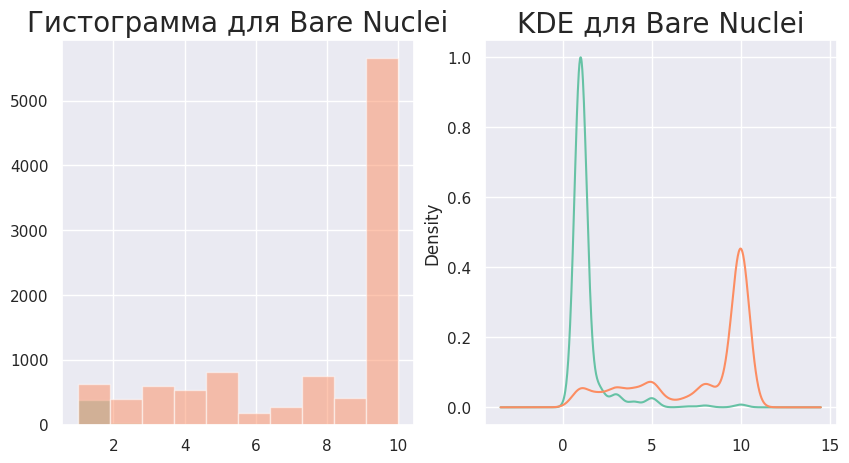

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:**

1. Гистограмма - столбчатая диаграмма, где по оси x отложены значения переменной, а по оси y - относительная частота наблюдений в каждом интервале. При построении требуется выбор числа интервалов, что влияет на восприятие распределения в данных.

2. ЯОП - позволяет оценить форму распределения и концентрацию данных в различных частях ОДЗ. При построении требуется выбор ширины ядра, что вляиет на восприятие распределения. Основынм плюсом является то, что по сравнению с гистограммой, ЯОП предоставляет более гладкую оценку плотности.

3. Из гистограммы и ЯОП явно виден дисбаланас классов. Из гистограммы это следует из того, то оранжевых данных больше, чем зеленых, а из ЯОП - пик одноко класса намного выше другого.




Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

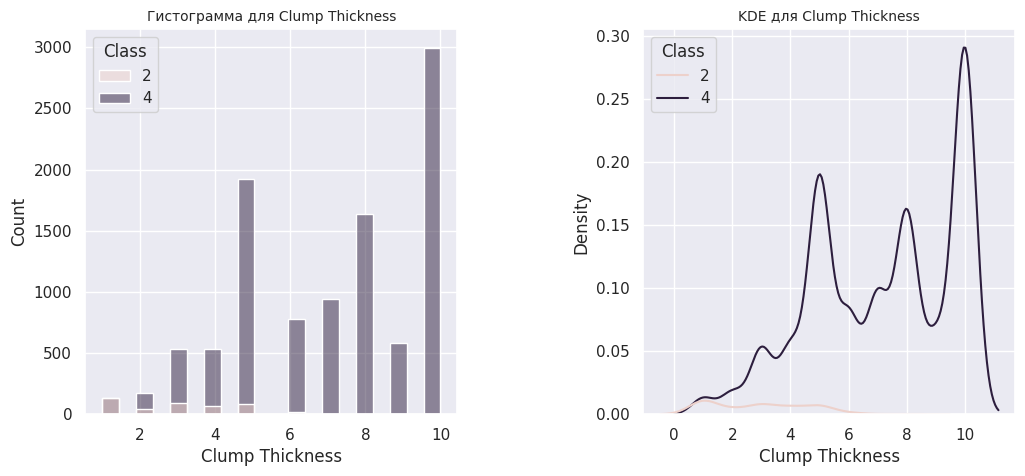

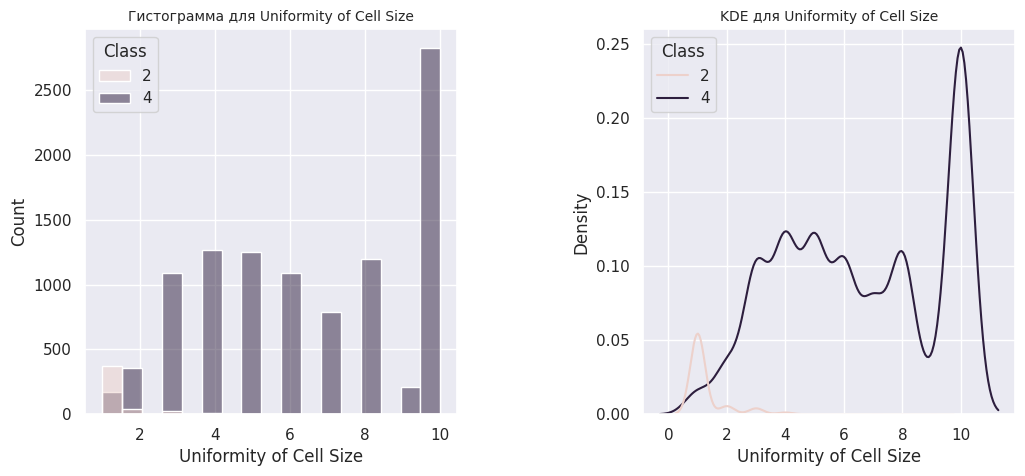

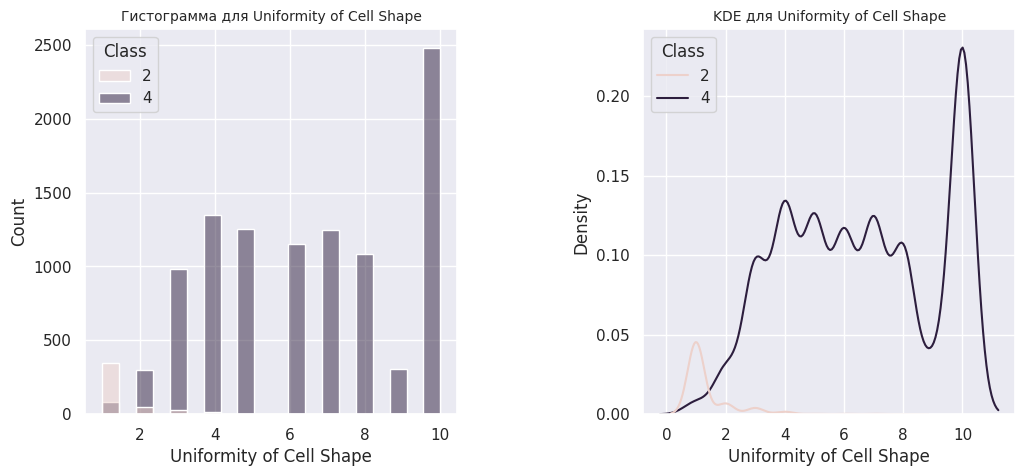

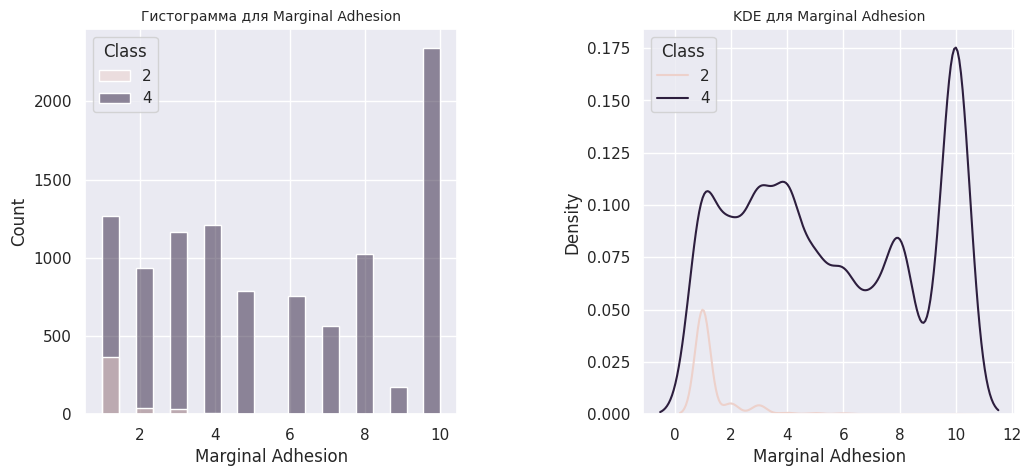

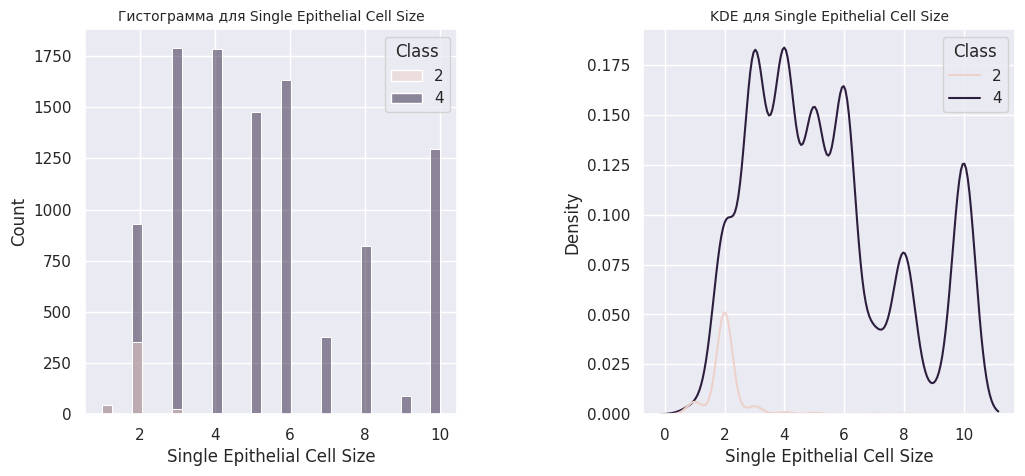

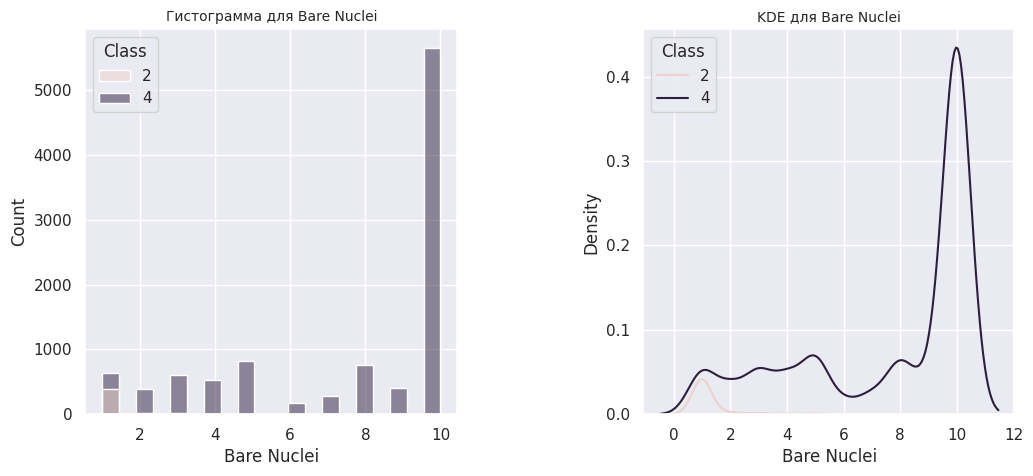

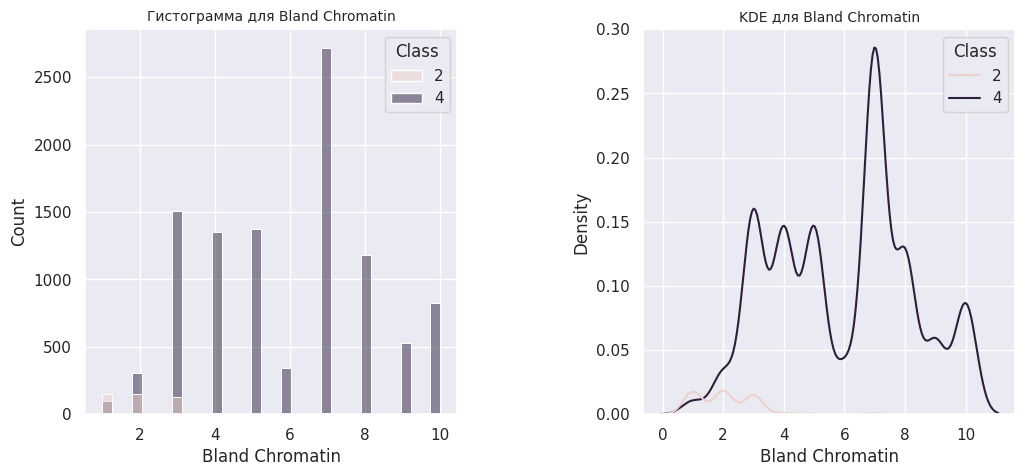

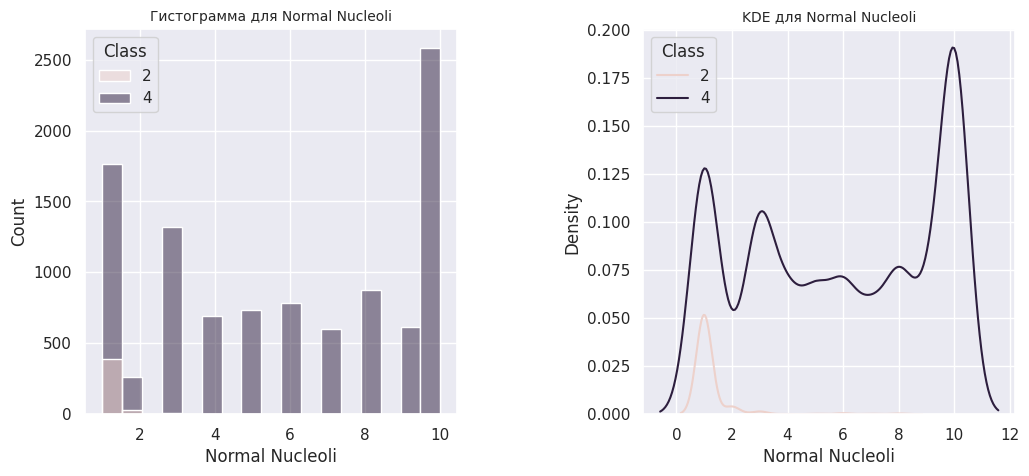

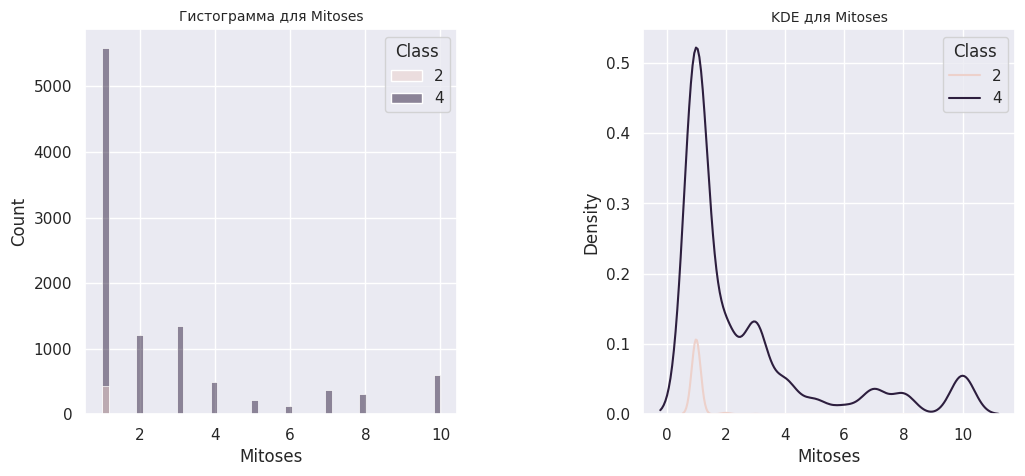

In [ ]:
for feature in data.columns[:-1]:
  fig, axs = plt.subplots(1, 2, figsize = (12, 5))
  plt.subplots_adjust(wspace = 0.5)

  sns.histplot(data = data, x = feature, hue = 'Class', alpha = 0.5, ax = axs[0])
  axs[0].set_title(f'Гистограмма для {feature}', fontsize = 10)

  sns.kdeplot(data = data, x = feature, hue = 'Class', common_norm = True, ax = axs[1])
  axs[1].set_title(f'KDE для {feature}', fontsize = 10)

Какие выводы вы можете сделать из полученных графиков?

**Вывод:**

1) Во всех графиках виден дисбаланс между классами.

2) Из KDE сложно установить тип распределения.

3) Также видно, что для некоторых приззнаков, максимумы распредения плотности совпадают (конкретнее для Mitoses, Normal Nucleoli, Bare Nuclei, Marginal Adhesion (но тут плохо видно).

**Это не конец задачи! Переходите к пункту 2!**

#### *Профиль физика*

Загрузите данные по бинарной классификации астероидов в зависимости от различных параметров с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data). Можно заметить, что наш датасет сильно меньше по размерам, чем оригинал. Это сделано намеренно.

In [ ]:
data = pd.read_csv('dataset_savaged.csv')
data.info()

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `rms` для разных классов:

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['rms'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['rms'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для rms', fontsize=20)
axs[1].set_title('KDE для rms', fontsize=20);

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** <...>

Постройте гистограммы и ядерные оценки плотности для указанных ниже признаков отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

In [ ]:
features = ['epoch', 'ma', 'tp', 'rms']
<...>

Какие выводы вы можете сделать из полученных графиков?

**Вывод:**<...>

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7478, 9) (7478,) (3205, 9) (3205,)


Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Объясните, что делает `StandardScaler` и почему его нельзя обучать на тестовой выборке?

**Ответ:**

$StandardScaler = \frac{x_{ij} - \bar{x_j}}{\sigma_j}$. Из формулы видно, что данный метод выполняет стандартизацию признаков путем усреднения удаления среднего значения и масштабирования к единичной диспресии. Этот метод позволяет сделать признаки независимыми от единиц измерения, тем самым обеспечивая более стабильное обучение нашей модели.

Данный метод нельхя применять к тестовой выборке, так как сам процесс масштабирования будет нацелен не на те данные, точнее на конкретные характеристики из тестовой выборки. В этом случае мы будем использовать информацию из тестовой выборки для преобразованных данных что может привести, к так называемой, утечке данных из тестового набора в процессе обучения.

Обучите модель логистической регрессии.

In [ ]:
model = LogisticRegression(fit_intercept = True)

model.fit(X_train, y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания, рассмотрите метрики: `accuracy_score`, `precision` и `recall`.

Если названия ваших классов отличаются от 0 и 1, то надо использовать аргумент `pos_label`.

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# Будем считать, что 2 - положительный класс, тот что менее выражен
precision = precision_score(y_test, y_pred, pos_label = 2)
recall = recall_score(y_test, y_pred, pos_label = 2)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9969
Precision: 1.0000
Recall: 0.9254


Можем ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими.

**Ответ:**

При анализе гистограмм и KDE был отмесен дисбаланс междк классами 2 и 4.

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

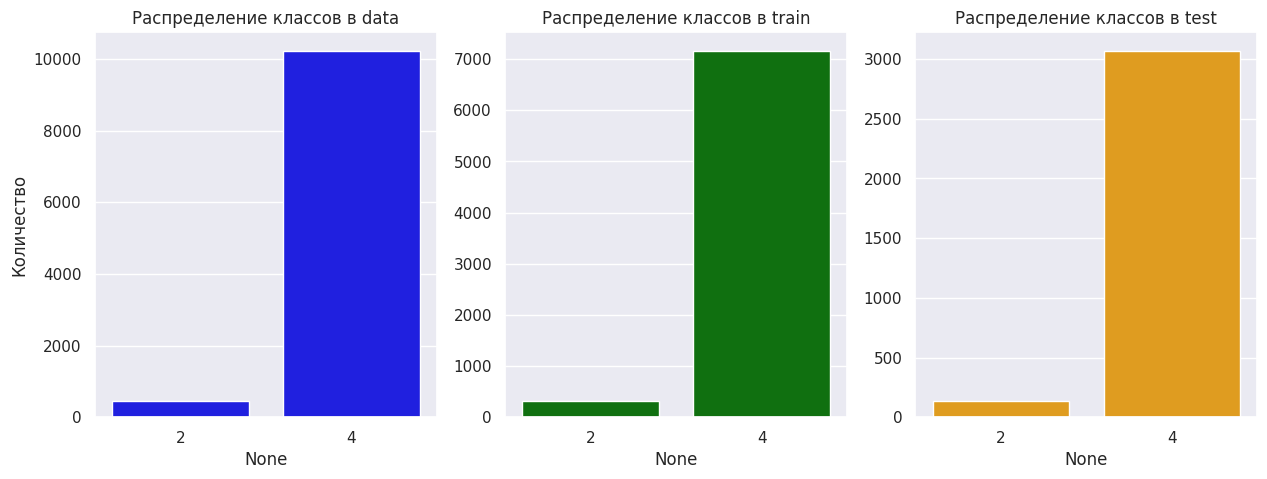

In [ ]:
original = data['Class'].value_counts() # Колонка таргета из изначального датасета
train = y_train.value_counts() # Колонка таргета из тренировочного датасета
test = y_test.value_counts() # Колонка таргета из тестового датасета

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=['blue'])
axes[0].set_title('Распределение классов в data')
axes[0].set_ylabel('Количество')

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=['green'])
axes[1].set_title('Распределение классов в train')

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=['orange'])
axes[2].set_title('Распределение классов в test')

plt.show()

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:**

1. Метрика Accuracy безумно большая (что довольно обманчиво на первый взгляд). В случае дисбаланса между классами, если модель предсказывает преимущественно 4-ый класс, Accuracy может быть высоким. Но это не гарантирует, что модель хорошо работает для 2-го класса.

2. Что касается метрик Precision и Recall, то могут быть более информативными в данном случае. Если интересует именно положительный класс (тот что менее выражен), то Recall становится ключевой метрикой, так как она измеряет способность модели обнаруживать положительные случаи.

3. Исходя из 1 и 2 пункта можно сделать вывод о том, что в случае доминирования 4-го класса, модель может быть склонна к заучиванию особенностей этого класса, игнорируя при этом особенности другого класса. Как следствие, это привело к тому, что модель плохо справляется с предсказанием 2-го класса.


Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия &mdash; для взвешенной логистической регресси будет записана как:

$$
L(y, \widehat{y}) = \sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$

где:


- $ y_i $ - истинный класс для образца  $i$
- $ \widehat{y}_i $ - предсказанный класс для образца $i$
- $ w_{y_i} $ - вес класса



Давайте реализуем этот метод. Допишите код и в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

In [ ]:
threshold = y_train.value_counts(normalize = True)[2]
class_weights = {2: threshold, 4: 1 - threshold}
# если использовать class_weights = 'balanced', модель сама подсчитает веса

weighted_model = LogisticRegression(class_weight = class_weights)

print("Количество экземпляров каждого класса в тренировочной выборке:")
print(y_train.value_counts())
print("Соотношение классов в тренировочной выборке:")
print(y_train.value_counts(normalize = True))

Количество экземпляров каждого класса в тренировочной выборке:
4    7168
2     310
Name: Class, dtype: int64
Соотношение классов в тренировочной выборке:
4    0.958545
2    0.041455
Name: Class, dtype: float64


Посчитайте метрики качества. `Accuracy` посчитайте двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

In [ ]:
unweighted_model = LogisticRegression()

unweighted_model.fit(X_train, y_train)

y_pred_unweighted = unweighted_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_unweighted)
precision = precision_score(y_test, y_pred_unweighted, pos_label = 2)
recall = recall_score(y_test, y_pred_unweighted, pos_label = 2)

print("Метрики качества без учета весов:")
print(f"accuracy = {accuracy:.4f} \nprecision = {precision:.4f} \nrecall = {recall:.4f}")

# Создаем модель с автоматическим подсчетом весов ('balanced')
weighted_model_auto = LogisticRegression(class_weight = 'balanced')

weighted_model_auto.fit(X_train, y_train)

y_pred_weighted_auto = weighted_model_auto.predict(X_test)

accuracy_auto = accuracy_score(y_test, y_pred_weighted_auto)
precision_auto = precision_score(y_test, y_pred_weighted_auto, pos_label = 2)
recall_auto = recall_score(y_test, y_pred_weighted_auto, pos_label = 2)

print("\nМетрики качества с учетом весов (автоматический подсчет):")
print(f"accuracy = {accuracy_auto:.4f} \nprecision = {precision_auto:.4f} \nrecall = {recall_auto:.4f}")

Метрики качества без учета весов:
accuracy = 0.9969 
precision = 1.0000 
recall = 0.9254

Метрики качества с учетом весов (автоматический подсчет):
accuracy = 0.9769 
precision = 0.6471 
recall = 0.9851


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

Сделайте общий вывод по задаче.

**Вывод:**

I. С учетом весов модель стала более сбалансированной в предсказании положительного класса 2, что видно, исходя из значений Precision и Recall. Видно, Recall вырос с 0.9254 до 0.9851. Из этого можно сделать вывод о том, что модель стала лучше выявлять положительные случаи.

II. Несбалансированные данные могут привести к плохим результатам (как мы увидели, подсчитав метрики). Исходя из данной задачи можно сделать вывод, что это очень важно учитывать при решении задачи классификации. Так же стоит отметить, что в случае с логистической регрессией, учет весов классов может помочь модели лучше обучиться менее выраженному классу, что в результате повышает качество предсказания для него.

**Общий вывод:**

I. В задаче классификации с несбалансированными данными важно учитывать веса классов для более корректного обучения модели.

II. Также мы можем сделать вывод о том, что метрики качества, такие как Precision и Recall, могут быть более информативными, чем Accuracy, в случае с задачей, связанной с дисбалансом классов.

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; `Lasso`, `Ridge`, `Elastic Net`.  

При выполнении задания воспользуйтесь готовыми реализациями методов в `sklearn`. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [ ]:
def calculate_coef(model, X, y, log_min, log_max,
               num):
    """
    Данная функция считает коэффициенты для признаков
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """

    alphas = np.logspace(log_min, log_max, num) # сетка параметров
    coefs = [] # коэффициенты моделей
    for a in alphas:
        if 'l1_ratio' in model.get_params(): # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a) # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20])
    return coefs

def draw_track(coefs, log_min, log_max,
               num, title='', figsize=(10, 5)):

    """
    Данная функция строит график зависимости значений
    коэффициентов модели от параметра регуляризации.

    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num) # сетка параметров

    plt.figure(figsize=figsize)
    ax = plt.gca() # используется для получения текущего экземпляра axes
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
        ind += 1

    ax.set_xscale('log') # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel('Параметр регуляризации', fontsize=19)
    plt.ylabel('Значения коэффициентов', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=8)
    plt.axis('tight')
    plt.show()

#### 1. Загрузка данных

#### *Профиль биология*

Скачайте данные с [сайта](https://miptstats.github.io/courses/ad_mipt.html). Оригинал вместе с описанием можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring). Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей.

In [ ]:
data = pd.read_csv('/content/data_hw4/parkinsons_updrs.data', sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков.

Также обратите внимане, что в данных есть группы (пациенты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [ ]:
data.drop('motor_UPDRS', axis = 1, inplace = True)
X = data.drop('total_UPDRS', axis = 1)
y = data['total_UPDRS']

Разбейте данные на обучающую и тестовую выборки в соотношении 7:3. Здесь не подойдет стандартный метод `test_train_split`, так как в данных есть группы. *Нельзя допускать, чтобы разные записи для одного пациента попали в разные подвыборки*.

**Также, выведите что-либо, подтверждающее данное свойство.**



In [ ]:
groups = data["subject#"]
gss = GroupShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
train_index, test_index = next(gss.split(X, y, groups = groups))

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Давайте выведем уникальные номера пациентов в обучающей выборке, чтобы подтвердить, что данные пациента остаются в одной выборке
print("Номера пациентов в обучающей выборке:")
print(*groups.iloc[train_index].unique())

print("\nНомера пациентов в тестовой выборке:")
print(*groups.iloc[test_index].unique())

Номера пациентов в обучающей выборке:
1 2 3 4 6 8 10 11 12 15 16 17 19 21 22 23 24 25 29 32 33 34 35 36 37 38 39 41 42

Номера пациентов в тестовой выборке:
5 7 9 13 14 18 20 26 27 28 30 31 40


Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку.

**Переходите к пункту 2.**

#### *Профиль физика*

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице в сжатом виде, которые действуют как молекулярные признаки. 0-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа. Этот столбец возьмем в качестве индекса строк. Последний столбец `Eat` — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso. Этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*.

In [ ]:
data = pd.read_csv('physics_data.csv', index_col=0)
data.head()

Разделите данные на признаки $X$ и целевые переменные $y$. **Для дальнейших заданий оставьте 20 признаков.**

In [ ]:
<...>

Разделите выборку в отношении 7:3. Далее везде, вплоть до сравнения моделей, используйте обучающую выборку.

In [ ]:
X_train, X_test, y_train, y_test = <...>

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку.


#### 2. Влияние регуляризации на коэффициенты моделей

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [ ]:
scaler = StandardScaler()

X_train_std_scal = scaler.fit_transform(X_train)
X_test_std_scal = scaler.transform(X_test)


Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

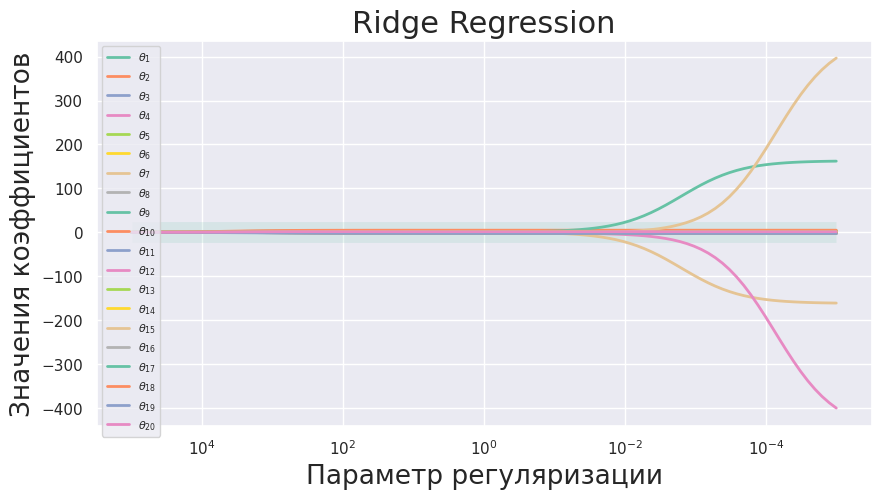

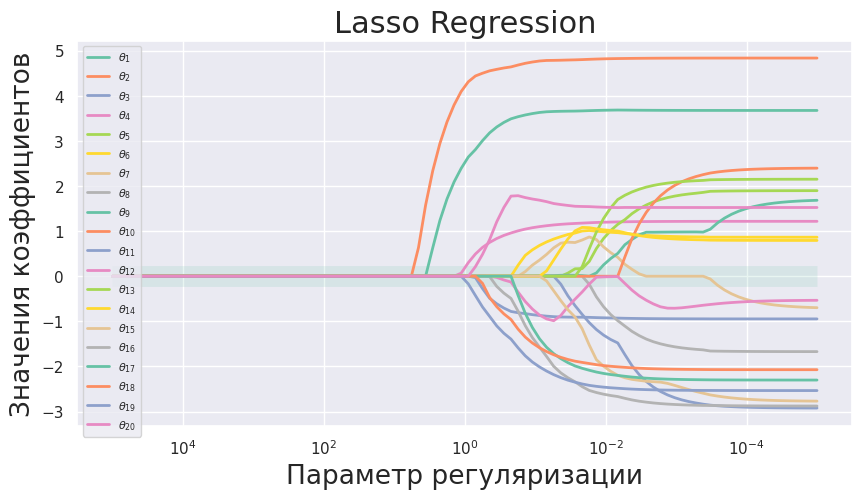

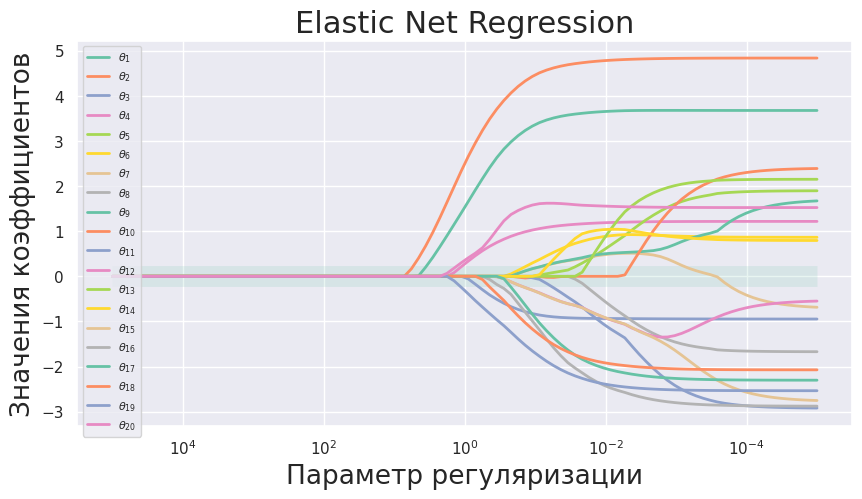

In [ ]:
# Ridge регрессия
# инициализация и обучение моддели
ridge_model = Ridge()

# коэффициенты регрессии
ridge_coefs = calculate_coef(ridge_model, X_train_std_scal, y_train, -5, 5, 100)

# отрисовка
draw_track(ridge_coefs, -5, 5, 100, 'Ridge Regression')


# Lasso регрессия
lasso_model = Lasso()
lasso_coefs = calculate_coef(lasso_model, X_train_std_scal, y_train, -5, 5, 100)
draw_track(lasso_coefs, -5, 5, 100, 'Lasso Regression')

# Elastic регрессия
elastic_model = ElasticNet(l1_ratio = 0.5)  # установите какое-то значение l1_ratio
elastic_coefs = calculate_coef(elastic_model, X_train_std_scal, y_train, -5, 5, 100)
draw_track(elastic_coefs, -5, 5, 100, 'Elastic Net Regression')

**Ответ:**

Оптимальные диапазоны для значения параметра регуляризации $\alpha$ могут явно зависеть от конкретных данных. Но я бы предположил, что для начала стоит начать с диапазона [-5, 5], так как логарифм от этого значения будет варьироваться в широком диапазоне. При необходимости, можно расширить или уменьшить этот диапазон в зависимости от полученных результатов. Но исходя из полученных рафиков данного диапазона более чем достаточно.

Посмотрите, как выглядят графики без стандартизации. Почему так происходит?

**Ответ:**

Возможно основной проблемой является мультиколлинеарность. Без стандартизации разные признаки могут взаимодействовать друг с другом, и это может привести к плохой оценке коэффициентов.

Также стоит учесть вариант того что признаки могут иметь разный масштаб, ведь в этом случае коэффициенты регрессии будут зависеть от конкретной шкалы для каждого произнака.

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета.

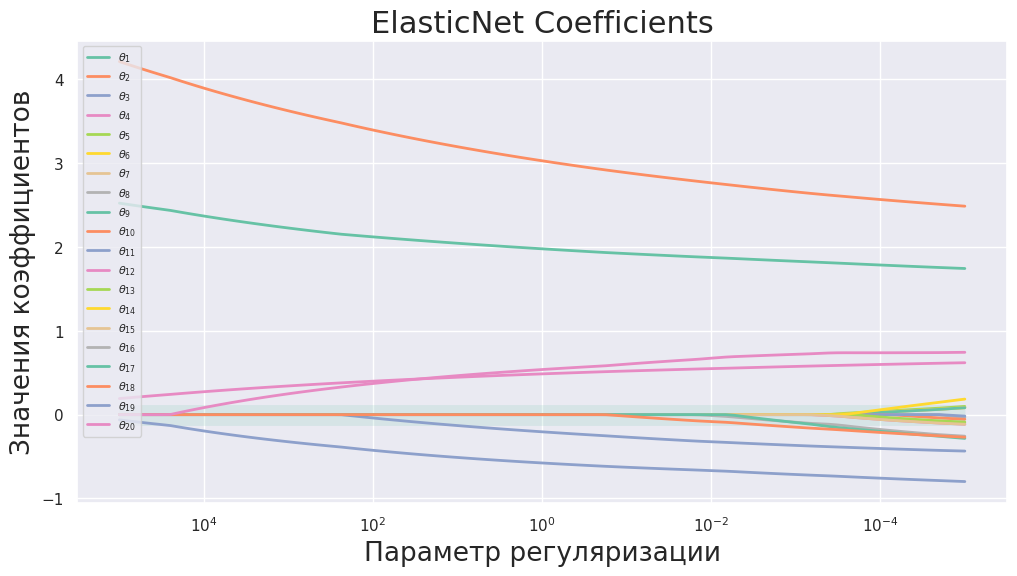

In [ ]:
grid = np.linspace(0, 1, 100)
coefs = []
model = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

for l1_ratio in grid:
    model.set_params(l1_ratio = l1_ratio) # Задайте новый параметр модели
    model.fit(X_train_std_scal, y_train) # Обучите
    coefs.append(model.coef_.copy()) # Добавьте в список

# Для визуализации можно использовать код из функции draw_track
draw_track(coefs, -5, 5, 100, title = 'ElasticNet Coefficients', figsize = (12, 6))

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:**

В контескте данной задачи отметим, что:

1) $\alpha$ - параметр отвечает за силу регуляризации. В прошлом семинаре мы пришли к выводу, что чем больше значение $\alpha$, тем сильнее проявляется регуляризация, а это в свою очередь приводит к уменьшению абсолютных значений весов признаков. Низкие же значения $\alpha$ позволяют модели иметь более сложные веса признаков.

2) l1_ratio - параметр, который определяет соотношение между Lasso и Ridge регуляризацией. В случае, когда l1_ratio равно 0, это эквивалентно только Ridge, а когда l1_ratio равно 1, это эквивалентно только Lasso. Промежуточные значения l1_ratio комбинируют обе регуляризации.

Т.о. исходя из полученных грфаиков можно предложить использовать для параметра $\alpha$ диапазон от 0.01 до 1 с логарифмическим шагом. Для l1_ratio можно предложить равномерное распределение от 0.1 до 0.9.

Вообще, это можно ручками не подбирать, а использовать просто метод кросс-валидации :)


**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

***Физика:*** Для этого задания возьмите полный датасет &mdash; все 300 признаков.

In [ ]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_linreg_pred = linreg_model.predict(X_test)

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [ ]:
linreg = {}
linreg['MSE'] = mean_squared_error(y_test, y_linreg_pred)
linreg['MAE'] = mean_absolute_error(y_test, y_linreg_pred)
linreg['MAPE'] = mean_absolute_percentage_error(y_test, y_linreg_pred)

Допишите функцию для отрисовки изменения величины ошибки от параметра регуляризации.

In [ ]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей

    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [
            Ridge(alpha = a),
            Lasso(alpha = a),
            ElasticNet(alpha = a, l1_ratio = 0.2),
            ElasticNet(alpha = a, l1_ratio = 0.5),
            ElasticNet(alpha = a, l1_ratio = 0.8),
            linreg_model
        ]
        for model in models:

            # обучение модели и предсказание
            model.fit(X_train_std_scal, y_train)
            y_pred = model.predict(X_test_std_scal)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ['Ridge (l1_ratio = 1)', 'Lasso', 'ElasticNet (l1_ratio = 0.2)', 'ElasticNet (l1_ratio = 0.5)', 'ElasticNet (l1_ratio = 0.8)', 'No regularization']
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [ ]:
alphas = np.logspace(-2, 8, 20)

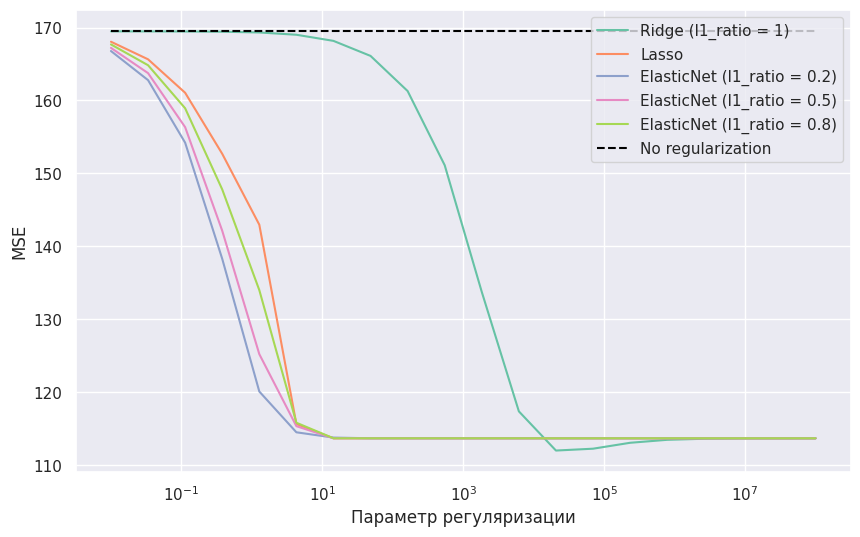

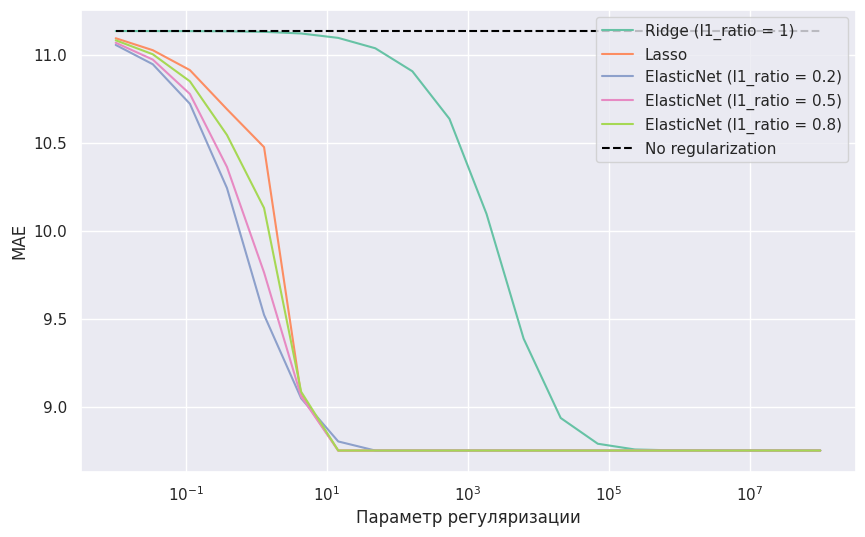

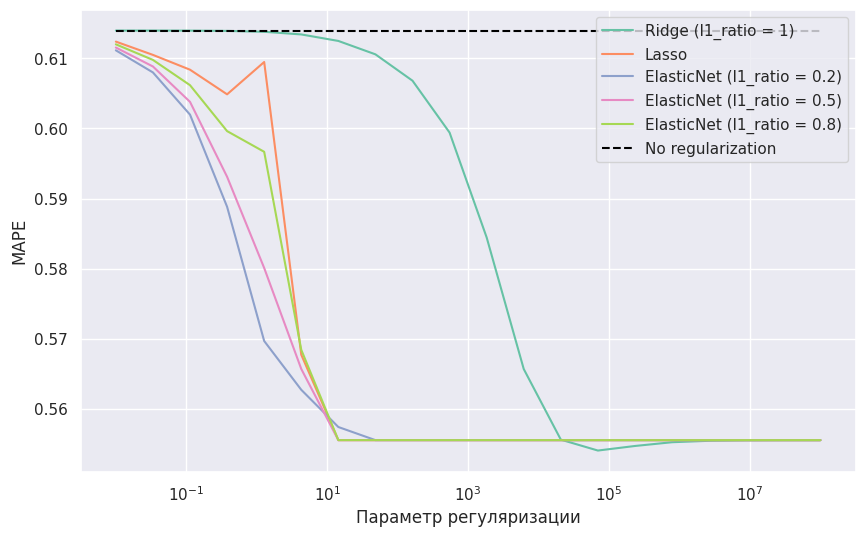

In [ ]:
# вложите в функции метрики
draw_errors(mean_squared_error, 'MSE', alphas)
draw_errors(mean_absolute_error, 'MAE', alphas)
draw_errors(mean_absolute_percentage_error, 'MAPE', alphas)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

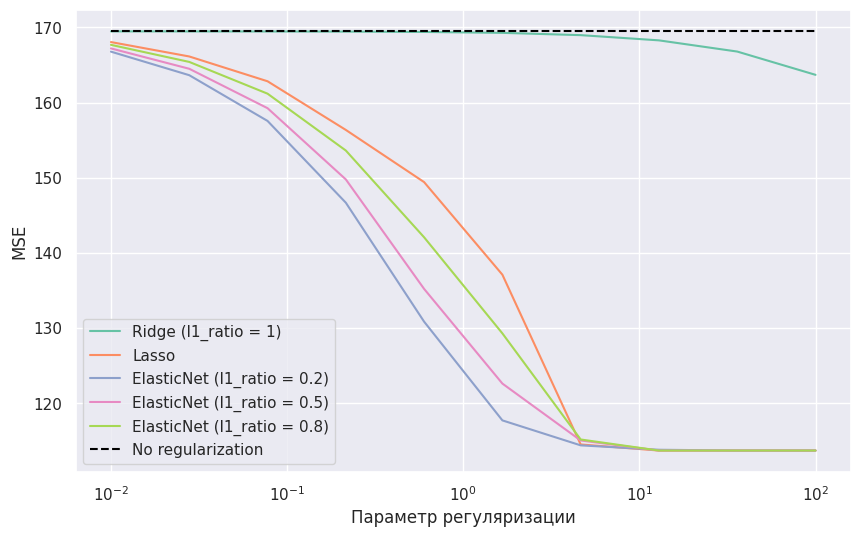

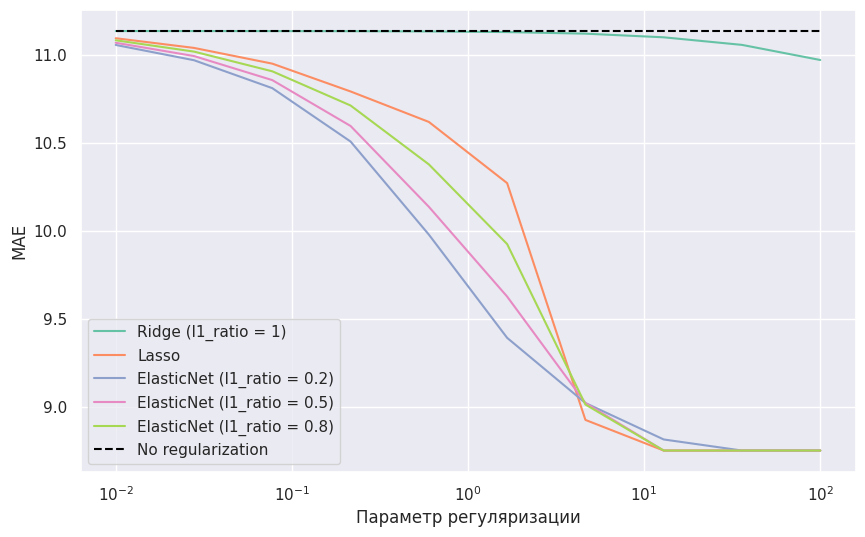

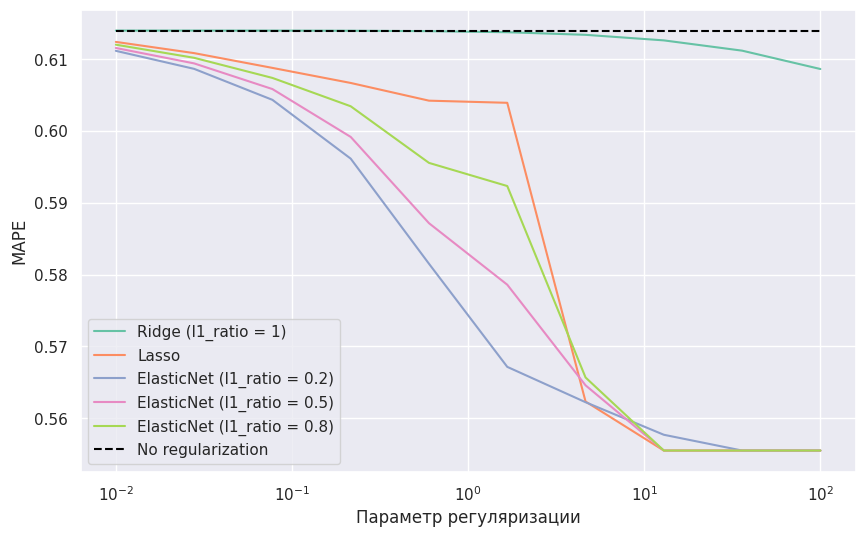

In [ ]:
# Более узкий диапазон alpha
alphas_ = np.logspace(-2, 2, 10)

# Построим графики для более узкого диапазона
draw_errors(mean_squared_error, 'MSE', alphas_)
draw_errors(mean_absolute_error, 'MAE', alphas_)
draw_errors(mean_absolute_percentage_error, 'MAPE', alphas_)

**3.** Сделайте общий вывод по задаче.

Укажите: в чем разница между `L1` и `L2` регуляризациями, как реализуется регуляризация в `ElasticNet`, что такое `l1-ratio` и зачем нужен, как это видно в наших графиках. (Своими словами)

**Вывод:**

**Разница между L1 и L2 регуляризациями:**

1) L1 регуляризация штрафует модель за слишком большие значения коэффициентов. Как следствие, это приводит к отбору нужных признаков. Она добавляет сумму абсолютных значений коэффициентов к функции потерь.

2) L2 регуляризация также штрафует за большие значения коэффициентов, но использует сумму квадратов коэффициентов. В отличие от L1, она обычно не приводит к полному исключению признаков.

**Регуляризация в ElasticNet:**

ElasticNet представляет собой комбинацию L1 и L2 регуляризаций. Она добавляет как штраф за сумму абсолютных значений коэффициентов, так и за сумму квадратов коэффициентов. Это позволяет учитывать как отбор признаков, так и устойчивость к мультиколлинеарности.

**l1-ratio в ElasticNet:**

l1-ratio в ElasticNet - параметр, который управляет балансом между L1 и L2 регуляризаций. Когда l1-ratio равно 0, это соответствует чистой L2 регуляризации, а когда 1 - чистой L1 регуляризации. Промежуточные значения соответствуют комбинированной регуляризации.

**Вывод из графиков:**

Графики зависимости значений коэффициентов от параметра регуляризации alpha и l1-ratio иллюстрируют, как регуляризация влияет на веса модели. Увеличение alpha усиливает регуляризацию, что может привести к уменьшению весов модели.
Изменение l1-ratio в ElasticNet также влияет на форму графика, что приводит к более осознанному отбору признаков и устойчивостью к мультиколлинеарности, как было отмесено ранее.

**Итог:**

В целом, регуляризация важна для решения проблемы  переобучения и улучшения качества нашей модели. Выбор между L1, L2 и их комбинацией зависит от конкретного типа задачи.

## Задача 4


Регуляризацию спользуют не только в задачах регрессии, но и в задачах классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция *правдоподобия*, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Мы получили логистическую регрессию c **$l_2$-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому такого понятия как "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение*,согласно выбранной метрике.

Выведите формулу поиска оценки коэффициентов методом *градиентного подъёма* и *стохастического градиентного подъёма* для
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

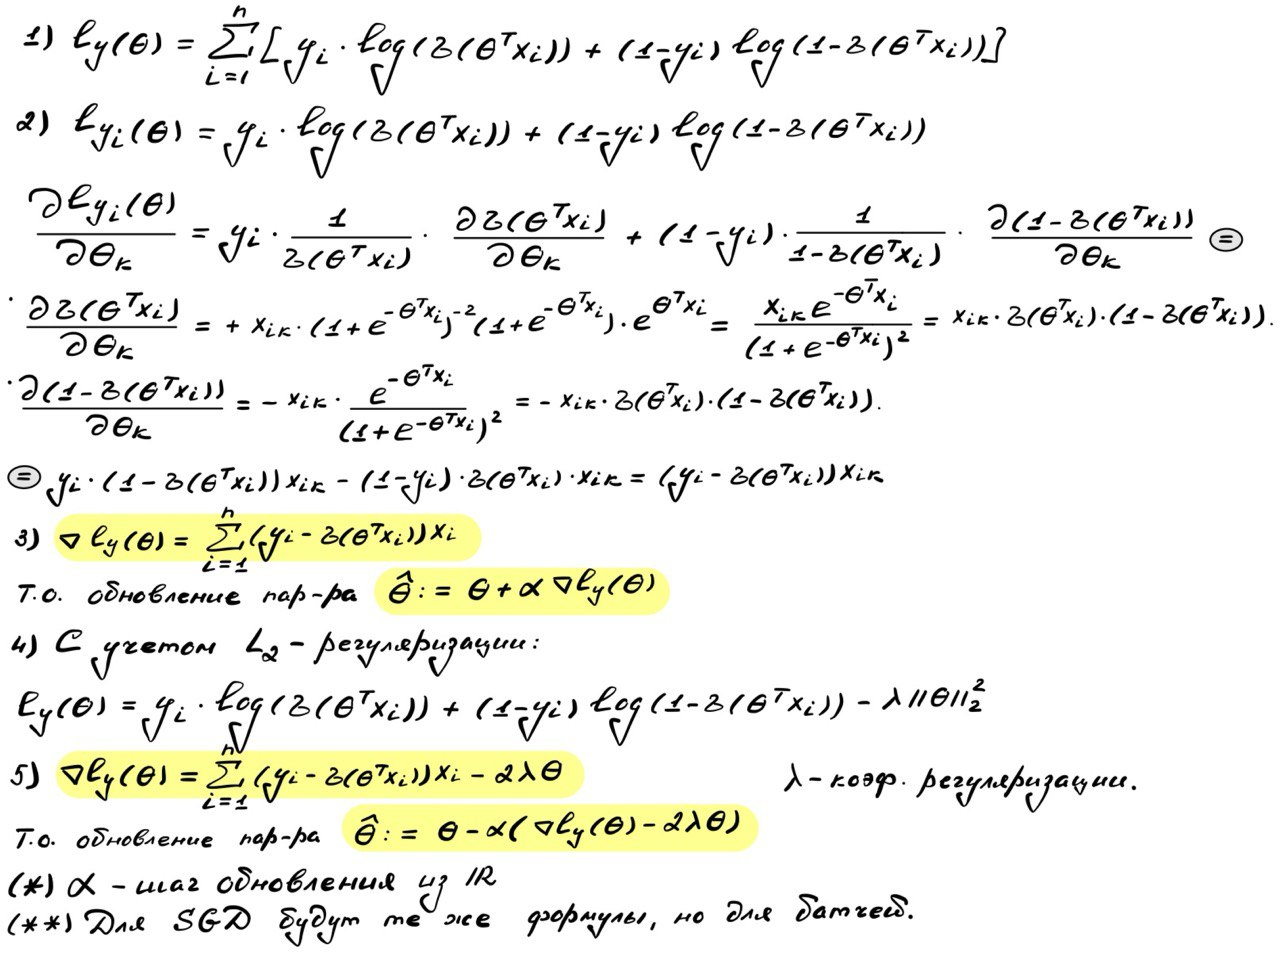